In [28]:
import pdb
import xarray as xr
import netCDF4 as nc 
import numpy as np
import sys 
import matplotlib.pyplot as plt

sys.path.append('../utils')

from datetime import timedelta
from visualizaciones.plot_as_sce import *

In [22]:
# ds_wrf = xr.open_dataset("/home/medico_eafit/WORKSPACES/sebastian_carmona/data/WRF/pblhSebas.nc", engine='netcdf4')
ds_wrf = xr.open_dataset(r"C:\Users\USUARIO\OneDrive - Universidad EAFIT\REPOSITORIOS\4DAir_SCE\data\WRF\d04.4DAIR_13042022.nc", engine='netcdf4')
ds_wrf

<xarray.Dataset> Size: 25GB
Dimensions:                (Time: 100, bottom_top: 70, south_north: 147,
                            west_east: 147, bio_emissions_dimension_stag: 41,
                            klevs_for_dvel: 1, bottom_top_stag: 71,
                            soil_layers_stag: 4, west_east_stag: 148,
                            south_north_stag: 148, seed_dim_stag: 33,
                            snow_layers_stag: 3, snso_layers_stag: 7)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 9MB ...
    XLONG                  (Time, south_north, west_east) float32 9MB ...
    XTIME                  (Time) datetime64[ns] 800B ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 9MB ...
    XLONG_U                (Time, south_north, west_east_stag) float32 9MB ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 9MB ...
    XLONG_V                (Time, south_north_stag, west_east) float32 9MB ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east,
                                bio_emissions_dimension_stag, klevs_for_dvel,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                seed_dim_stag, snow_layers_stag,
                                snso_layers_stag
Data variables: (12/273)
    Times                  (Time) |S19 2kB ...
    AOD_OUT                (Time, bottom_top, south_north, west_east) float32 605MB ...
    AOD2D_OUT              (Time, south_north, west_east) float32 9MB ...
    ATOP2D_OUT             (Time, south_north, west_east) float32 9MB ...
    ICN_DIAG               (Time, bottom_top, south_north, west_east) float32 605MB ...
    NC_DIAG                (Time, bottom_top, south_north, west_east) float32 605MB ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 9MB ...
    PC                     (Time, south_north, west_east) float32 9MB ...
    LANDMASK               (Time, south_north, west_east) float32 9MB ...
    LAKEMASK               (Time, south_north, west_east) float32 9MB ...
    SST                    (Time, south_north, west_east) float32 9MB ...
    SST_INPUT              (Time, south_north, west_east) float32 9MB ...
Attributes: (12/151)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2022-04-10_00:00:00
    SIMULATION_START_DATE:           2022-04-10_00:00:00
    WEST-EAST_GRID_DIMENSION:        148
    SOUTH-NORTH_GRID_DIMENSION:      148
    BOTTOM-TOP_GRID_DIMENSION:       71
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Fri Nov  1 14:22:43 2024: ncrcat wrfout_...
    NCO:                             netCDF Operators version 5.1.7 (Homepage...

In [23]:
EAFIT_LOCATION = [6.2003256, -75.5786183]

def find_nearest_indices(ds, target_lat, target_lon):
    # Convertir las coordenadas a arrays de NumPy
    lat_diff = np.abs(ds.XLAT.sel(Time=0).values - target_lat)
    lon_diff = np.abs(ds.XLONG.sel(Time=0).values - target_lon)
    # Calcular la suma de las diferencias
    total_diff = lat_diff + lon_diff

    # Encontrar los índices donde la diferencia es mínima
    min_diff_idx = np.unravel_index(np.argmin(total_diff), total_diff.shape)
    
    # Devolver los índices de south_north y west_east
    south_north_idx = min_diff_idx[0]
    west_east_idx = min_diff_idx[1]
    
    return south_north_idx, west_east_idx

In [24]:
south_north_idx, west_east_idx = find_nearest_indices(ds_wrf, target_lat=EAFIT_LOCATION[0], target_lon=EAFIT_LOCATION[1])

ds_wrf = ds_wrf.sel(south_north=south_north_idx, west_east=west_east_idx)


In [25]:
ds_wrf

<xarray.Dataset> Size: 11MB
Dimensions:                (Time: 100, bottom_top: 70,
                            bio_emissions_dimension_stag: 41,
                            klevs_for_dvel: 1, bottom_top_stag: 71,
                            soil_layers_stag: 4, west_east_stag: 148,
                            south_north_stag: 148, seed_dim_stag: 33,
                            snow_layers_stag: 3, snso_layers_stag: 7)
Coordinates:
    XLAT                   (Time) float32 400B ...
    XLONG                  (Time) float32 400B ...
    XTIME                  (Time) datetime64[ns] 800B ...
    XLAT_U                 (Time, west_east_stag) float32 59kB ...
    XLONG_U                (Time, west_east_stag) float32 59kB ...
    XLAT_V                 (Time, south_north_stag) float32 59kB ...
    XLONG_V                (Time, south_north_stag) float32 59kB ...
Dimensions without coordinates: Time, bottom_top, bio_emissions_dimension_stag,
                                klevs_for_dvel, bottom_top_stag,
                                soil_layers_stag, west_east_stag,
                                south_north_stag, seed_dim_stag,
                                snow_layers_stag, snso_layers_stag
Data variables: (12/273)
    Times                  (Time) |S19 2kB ...
    AOD_OUT                (Time, bottom_top) float32 28kB ...
    AOD2D_OUT              (Time) float32 400B ...
    ATOP2D_OUT             (Time) float32 400B ...
    ICN_DIAG               (Time, bottom_top) float32 28kB ...
    NC_DIAG                (Time, bottom_top) float32 28kB ...
    ...                     ...
    PCB                    (Time) float32 400B ...
    PC                     (Time) float32 400B ...
    LANDMASK               (Time) float32 400B ...
    LAKEMASK               (Time) float32 400B ...
    SST                    (Time) float32 400B ...
    SST_INPUT              (Time) float32 400B ...
Attributes: (12/151)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2022-04-10_00:00:00
    SIMULATION_START_DATE:           2022-04-10_00:00:00
    WEST-EAST_GRID_DIMENSION:        148
    SOUTH-NORTH_GRID_DIMENSION:      148
    BOTTOM-TOP_GRID_DIMENSION:       71
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Fri Nov  1 14:22:43 2024: ncrcat wrfout_...
    NCO:                             netCDF Operators version 5.1.7 (Homepage...

In [34]:
import pandas as pd



xtime_series = pd.to_datetime(ds_wrf.XTIME.values)
xtime_adjusted = xtime_series - pd.Timedelta(hours=5)
xtime_adjusted_values = xtime_adjusted.to_numpy()

In [35]:
# Asignar XTIME como la coordenada de la dimensión 'Time'
ds_wrf = ds_wrf.assign_coords(Time=xtime_adjusted_values)

# Si deseas, puedes eliminar la coordenada original XTIME si ya no es necesaria
ds_wrf = ds_wrf.drop_vars('XTIME')

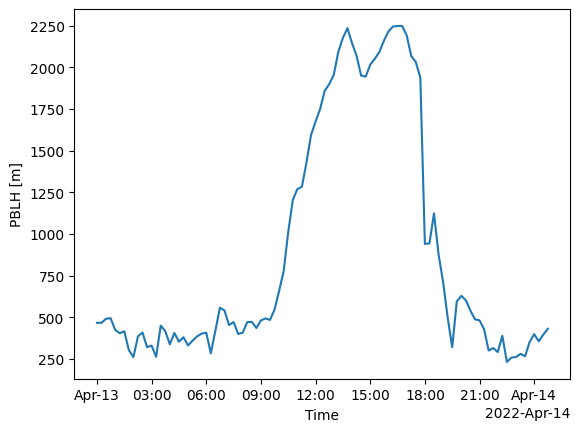

In [36]:
ds_wrf.PBLH.plot(x="Time")

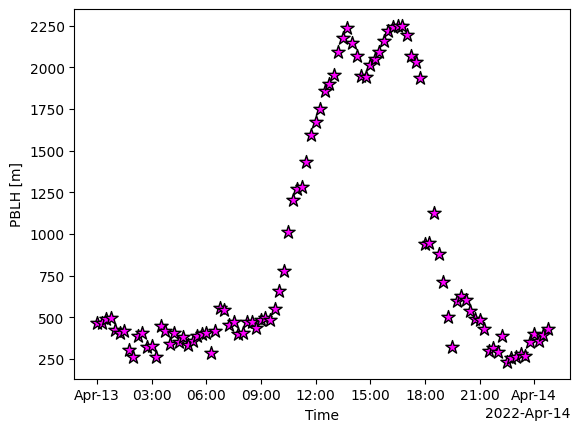

In [37]:
ds_wrf.PBLH.plot.scatter(
        x="Time",
        s=100,
        marker="*",
        color="magenta",
        edgecolors="black",
    )

# Visualización sobre datos LIDAR

In [39]:
filename = '/home/medico_eafit/WORKSPACES/sebastian_carmona/data/EAFIT/Dataset1/LiMon_Raw_Data_cc/2022/04/13/RS/LPP_OUT/RS_L0_L1_L2.nc'
ncfile = nc.Dataset(filename)
group = ncfile.groups['L2_Data']
dataset_lidar = xr.open_dataset(xr.backends.NetCDF4DataStore(group))
global_attributes = {attr: ncfile.getncattr(attr) for attr in ncfile.ncattrs()}

start_time = dataset_lidar.Start_Time_AVG_L2.values.astype('float32') // 10**9
stop_time = dataset_lidar.Stop_Time_AVG_L2.values

avg_time = (start_time + stop_time) / 2

datetime_ns = np.array(avg_time, dtype='datetime64[s]')
datetime_ns = datetime_ns.astype('datetime64[ns]') 

dataset_lidar = dataset_lidar.assign_coords(time=datetime_ns)

dataset_lidar = dataset_lidar.sel(channels=0, range=slice(100, 5000))

dataset_lidar

OSError: [Errno -51] NetCDF: Unknown file format: '/home/medico_eafit/WORKSPACES/sebastian_carmona/data/EAFIT/Dataset1/LiMon_Raw_Data_cc/2022/04/13/RS/LPP_OUT/RS_L0_L1_L2.nc'

<class 'numpy.ndarray'>


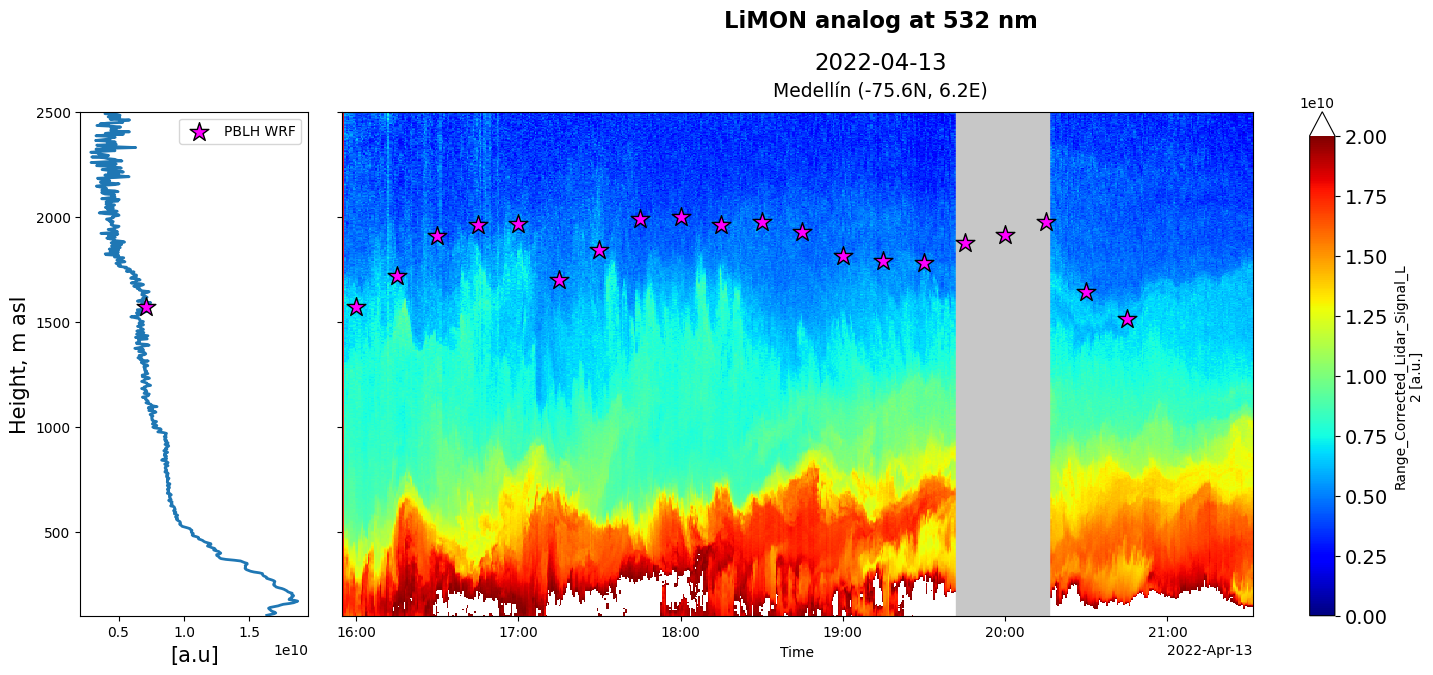

<class 'numpy.ndarray'>


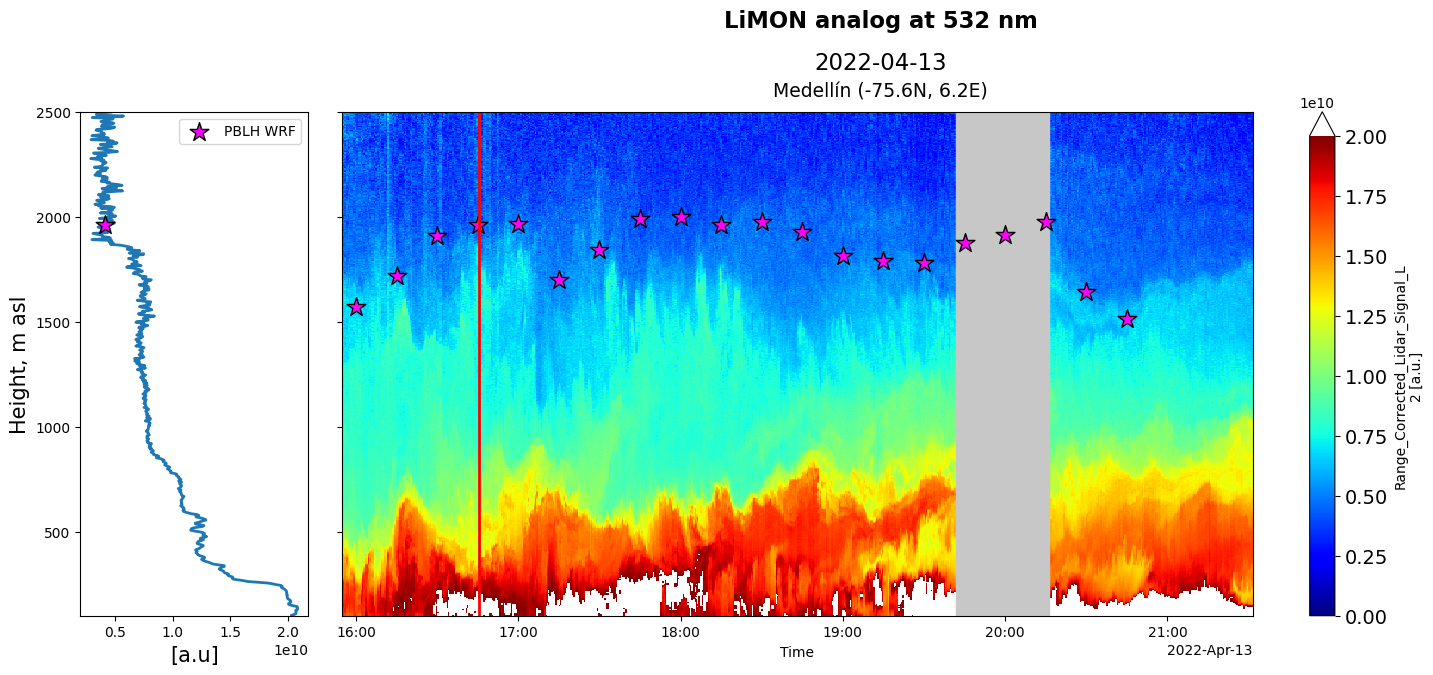

<class 'numpy.ndarray'>


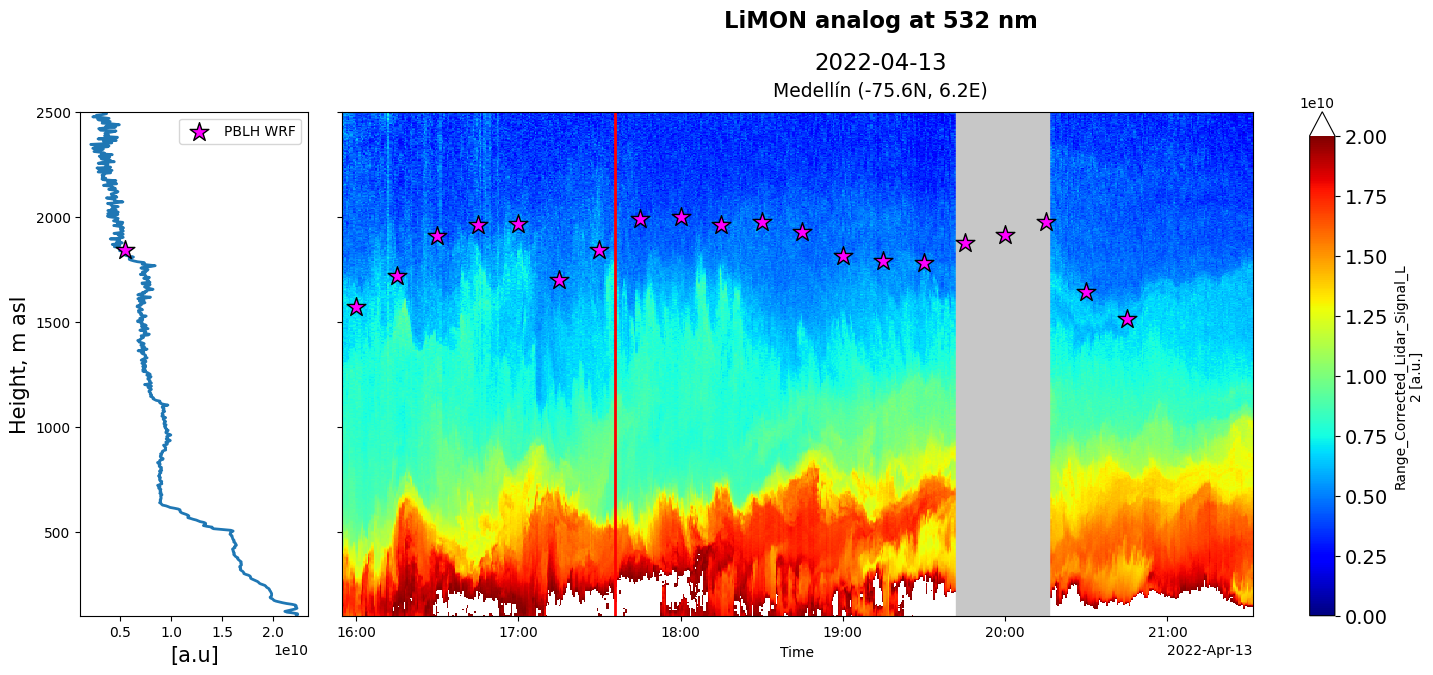

<class 'numpy.ndarray'>


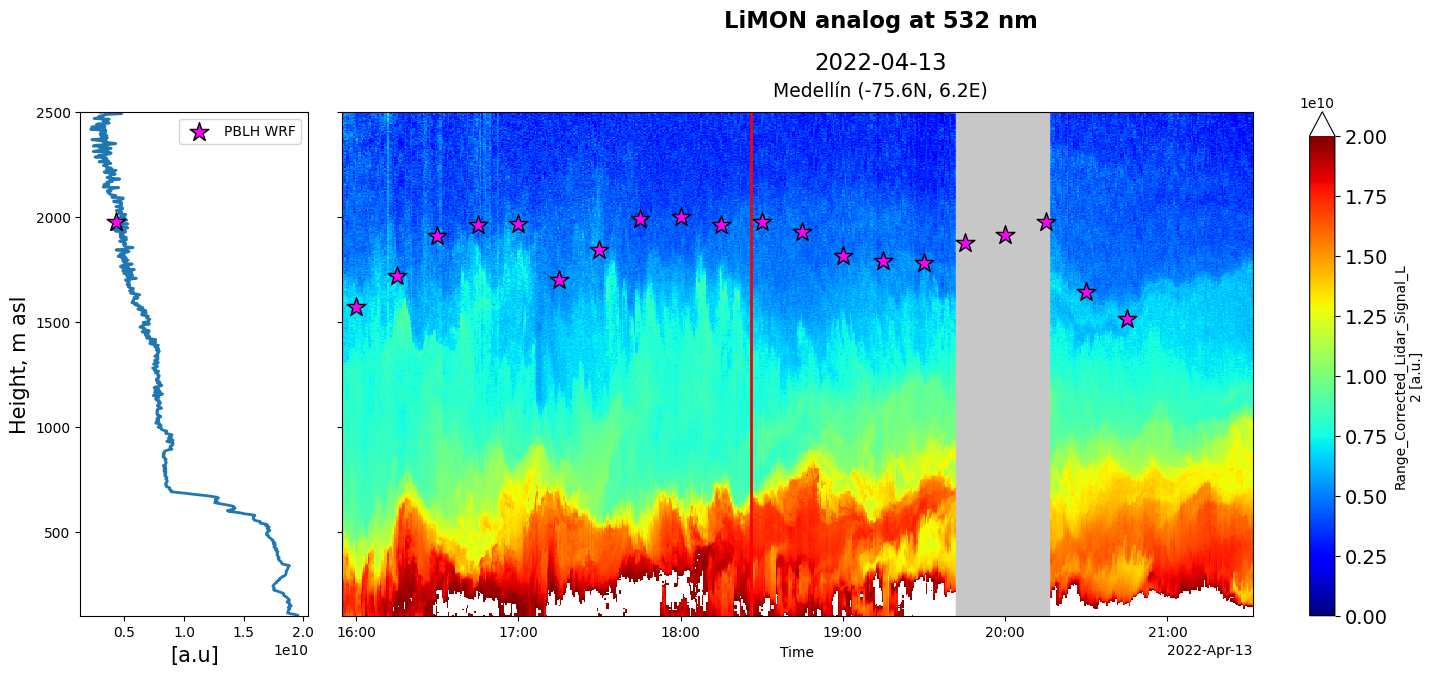

<class 'numpy.ndarray'>


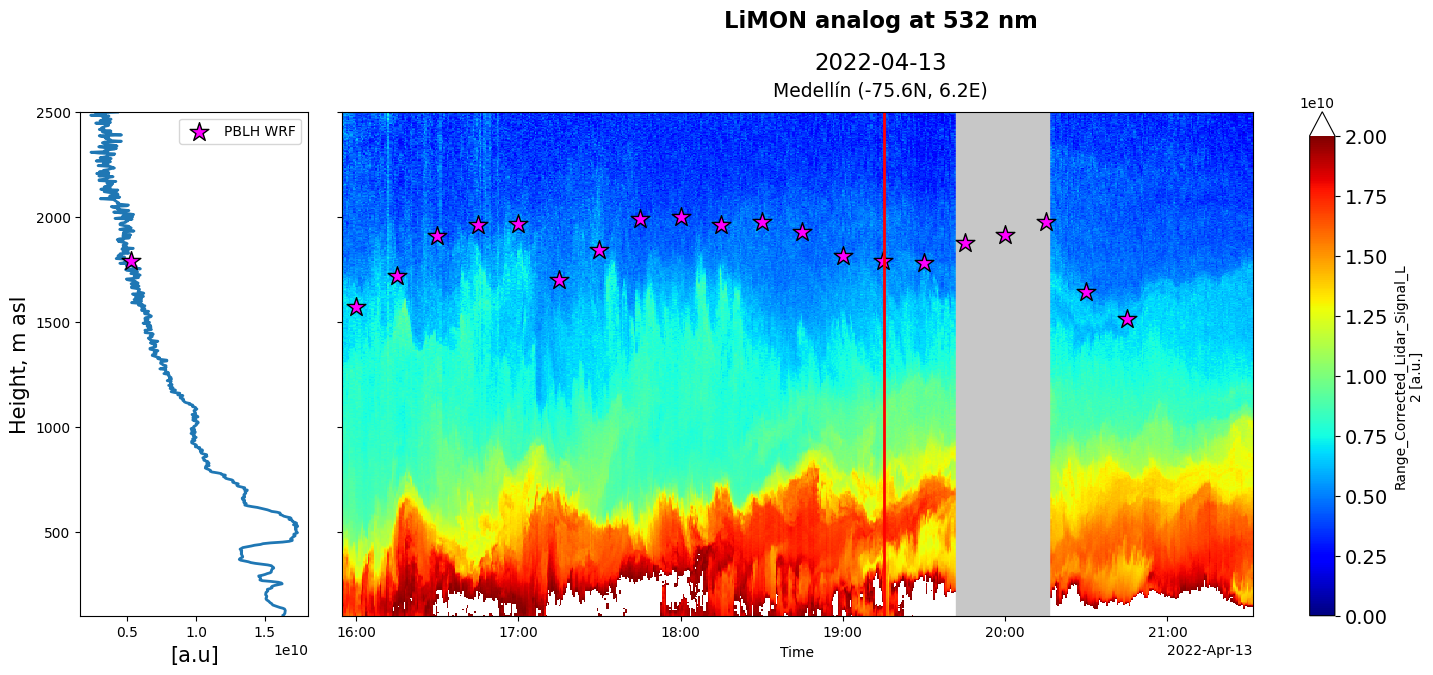

<class 'numpy.ndarray'>


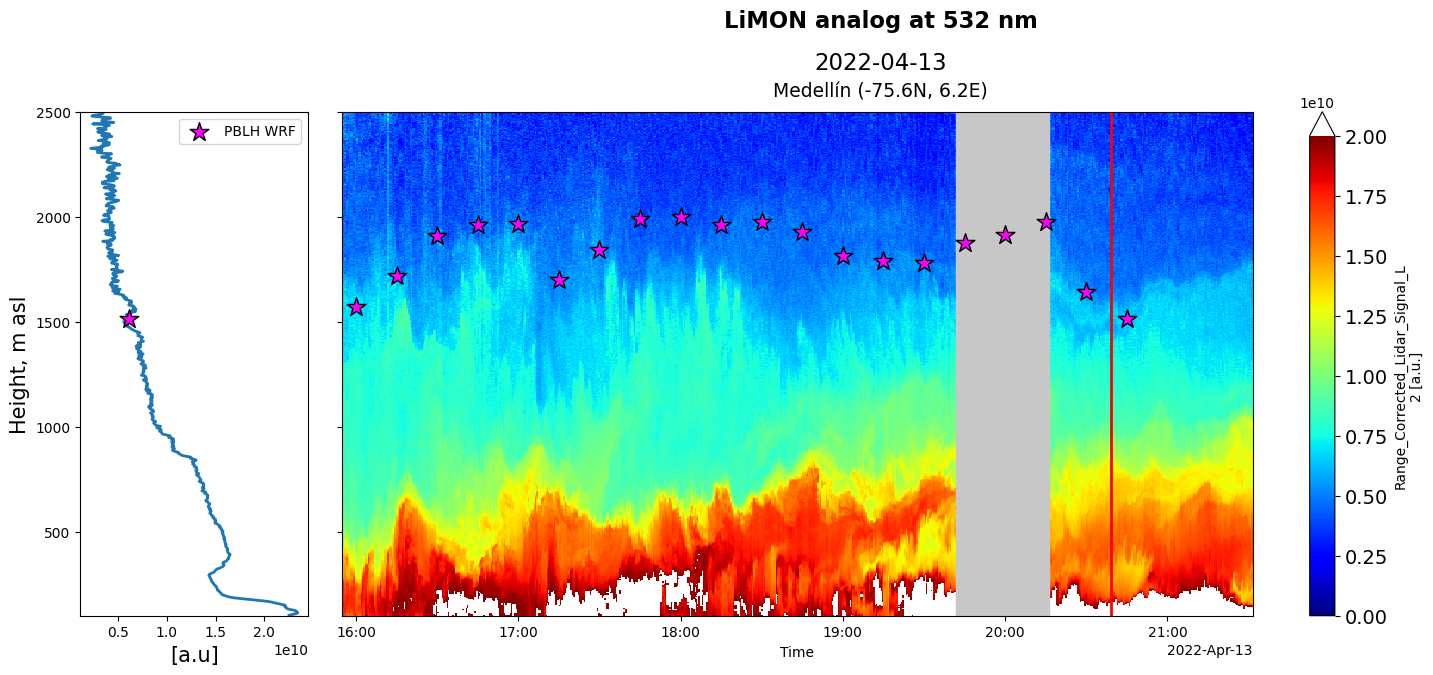

<class 'numpy.ndarray'>


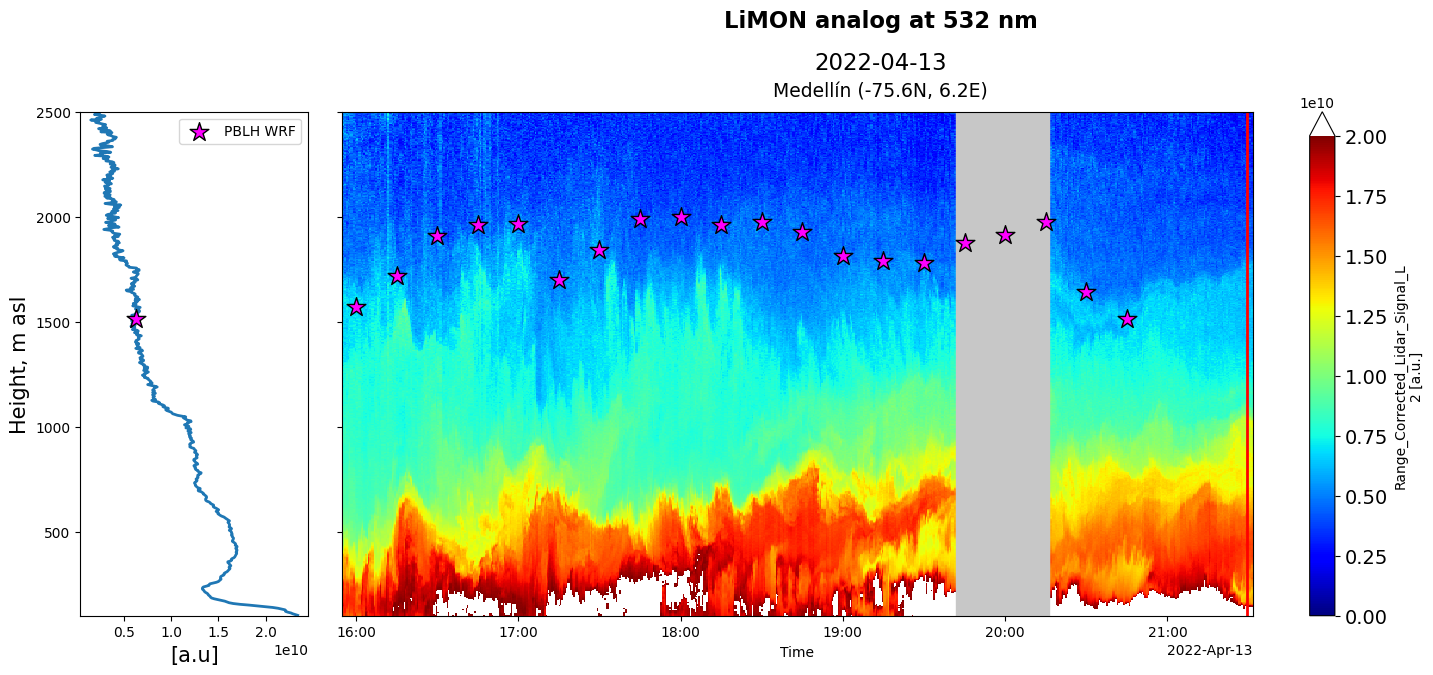

In [48]:

max_range = 2500
for time in dataset_lidar.time.values[::100]:
    # Definir subplots con proporción 1:4 entre ax1 y ax2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 7], sharey=True, gridspec_kw={'width_ratios': [1, 5]})

    # Obtener el perfil LIDAR para el tiempo actual
    lidar_profile = dataset_lidar.Range_Corrected_Lidar_Signal_L2.sel(time=time, range=slice(0, max_range))
    range_values = dataset_lidar.sel(range=slice(0, max_range)).range

    # Plot en ax1 con zorder menor
    ax1.plot(lidar_profile, range_values, linewidth=2, zorder=2)

    # Obtener los valores de PBLH para el tiempo actual
    pblh_wrf = ds_wrf.PBLH.sel(Time=time, method="nearest").values

    # Graficar las estrellas en ax1 con zorder mayor
    # Para pblh_wrf
    ax1.scatter(
        lidar_profile.sel(range=pblh_wrf, method="nearest"),
        pblh_wrf,
        marker="*",
        c="magenta",
        edgecolors="black",
        s=200,
        zorder=3,
        label='PBLH WRF'
    )



    ax1.legend()

    ax1.set_ylabel('Height, m asl', fontsize=15)
    ax1.set_xlabel('[a.u]', fontsize=15)

    # Plot en ax2
    plot_as_me(
        ds=dataset_lidar.sel(range=slice(0, max_range)),
        channel='Range_Corrected_Lidar_Signal_L2',
        axes=ax2,
        qt="Limon",
        wl="532",
        signal_mode="analog",
        attrs=global_attributes,
        vmin=0,
        vmax=2e10,
        fixed_time_range=False
    )

    ds_wrf.PBLH.plot.scatter(
        x="Time",
        ax=ax2,
        s=200,
        marker="*",
        color="magenta",
        edgecolors="black",
    )


    # Crear rectángulo para resaltar el tiempo actual en ax2
    endTime = time + np.timedelta64(1, 's')
    start = mpl.dates.date2num(time)
    end = mpl.dates.date2num(endTime)
    width = end - start
    rect = mpl.patches.Rectangle(
        (start, 0),
        width,
        max_range,
        linewidth=2,
        color='red',
        fill=False
    )
    ax2.add_patch(rect)

    # Eliminar etiquetas de ticks del eje y en ax2
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel('')  # Eliminar label del eje y en ax2

    plt.subplots_adjust(
        left=0.1,
        bottom=0.1,
        right=0.8,
        top=0.82,
        wspace=0.05,
        hspace=0.4
    )
    plt.show()


<class 'numpy.ndarray'>


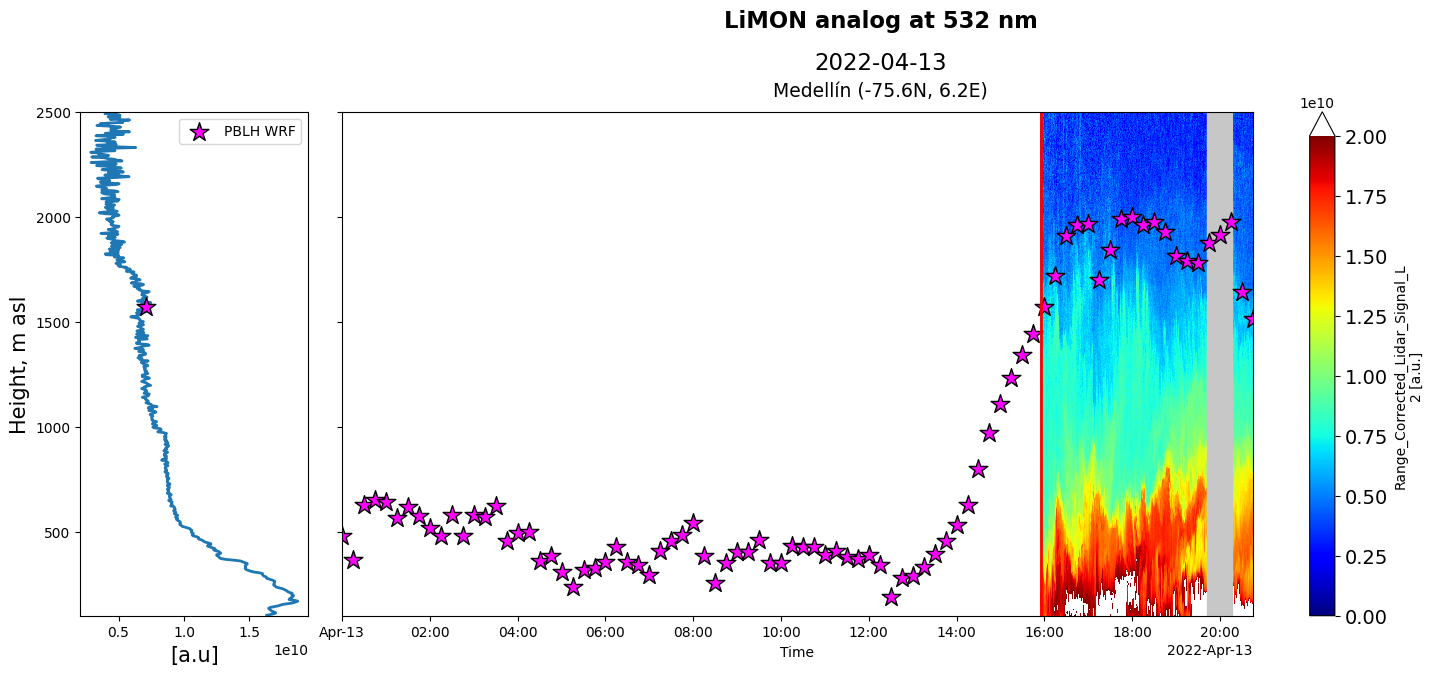

<class 'numpy.ndarray'>


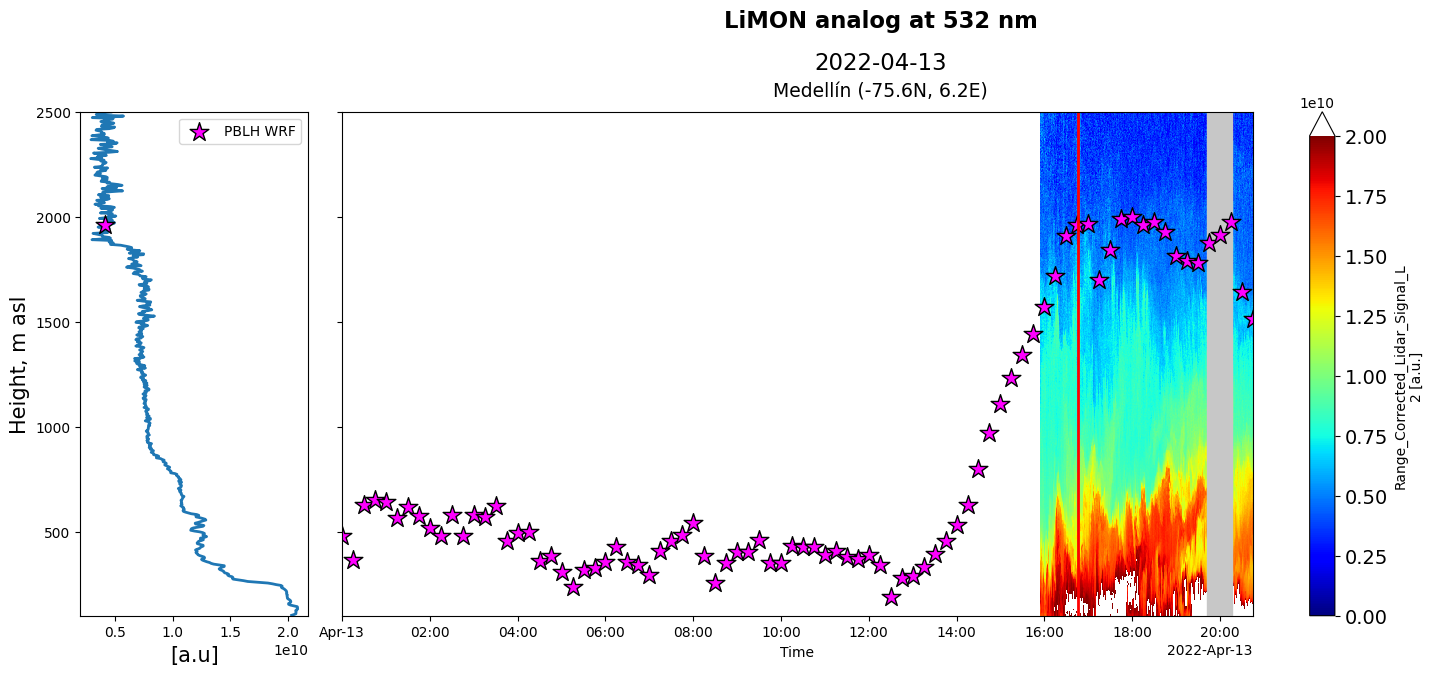

<class 'numpy.ndarray'>


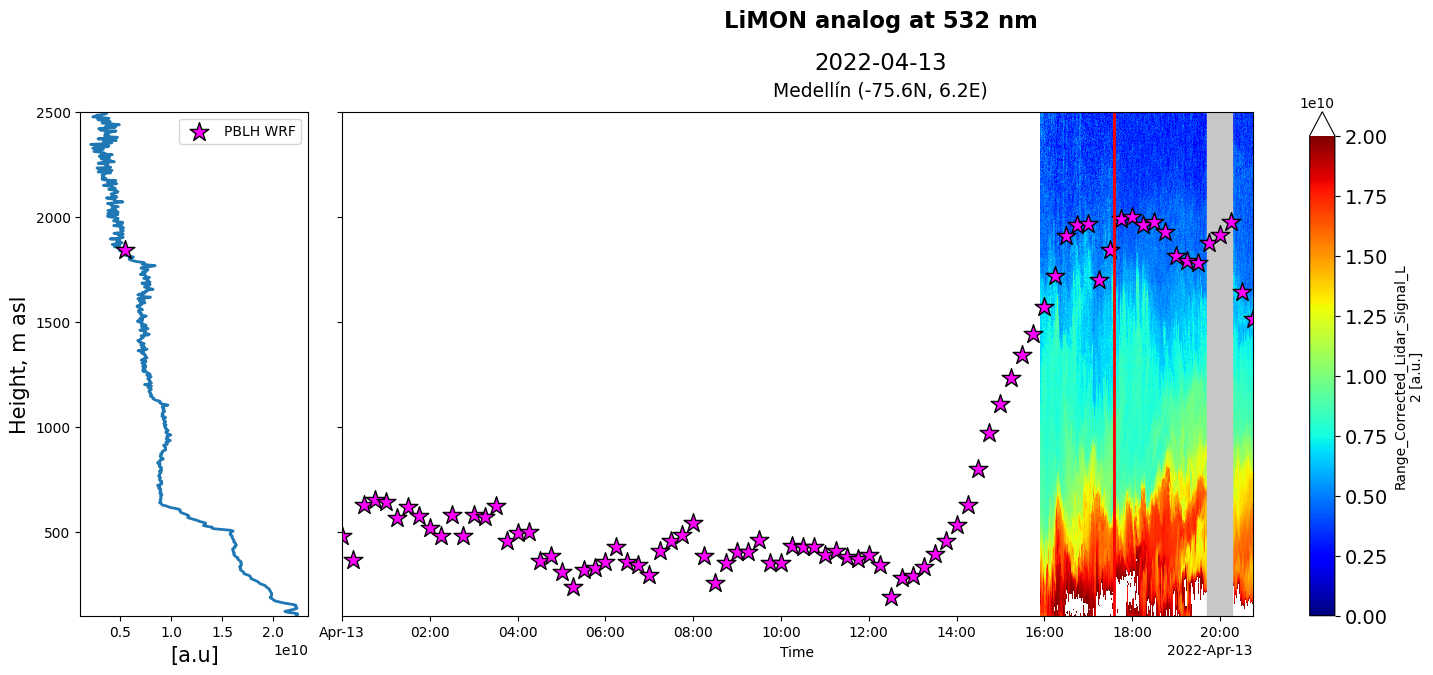

<class 'numpy.ndarray'>


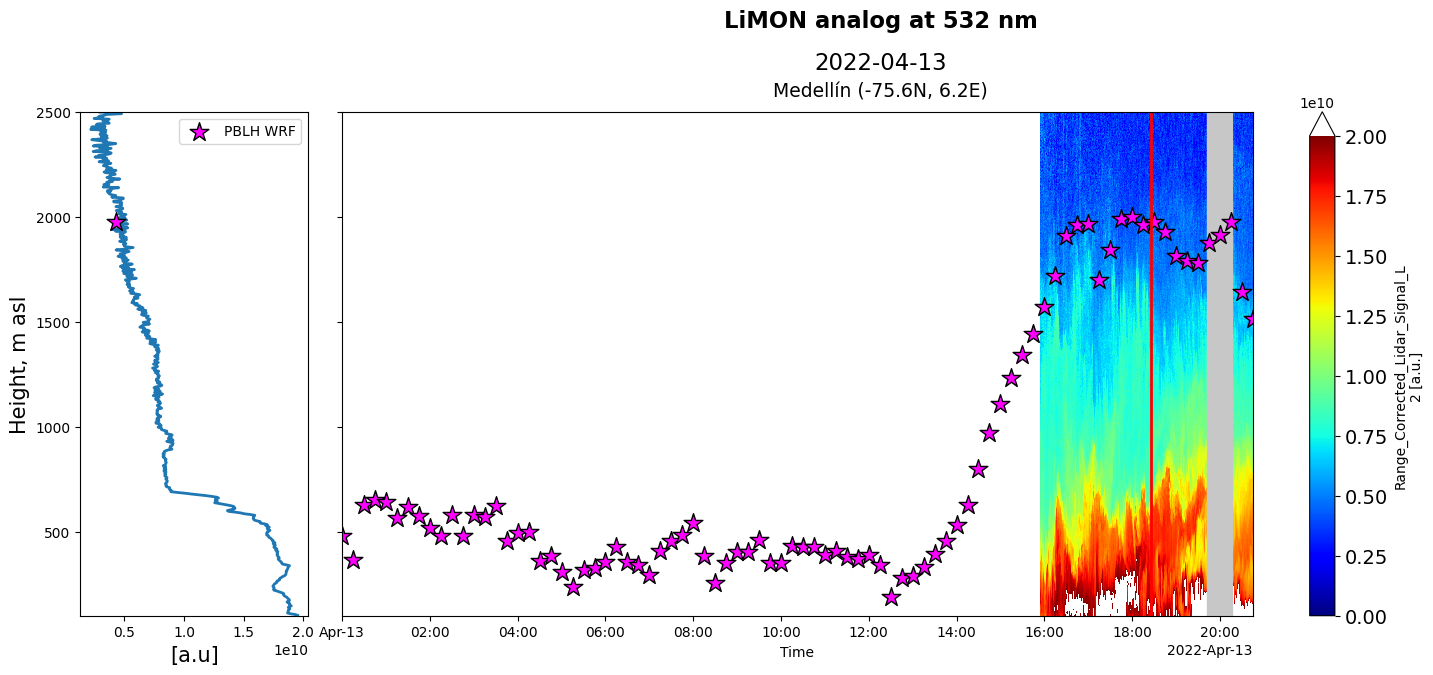

<class 'numpy.ndarray'>


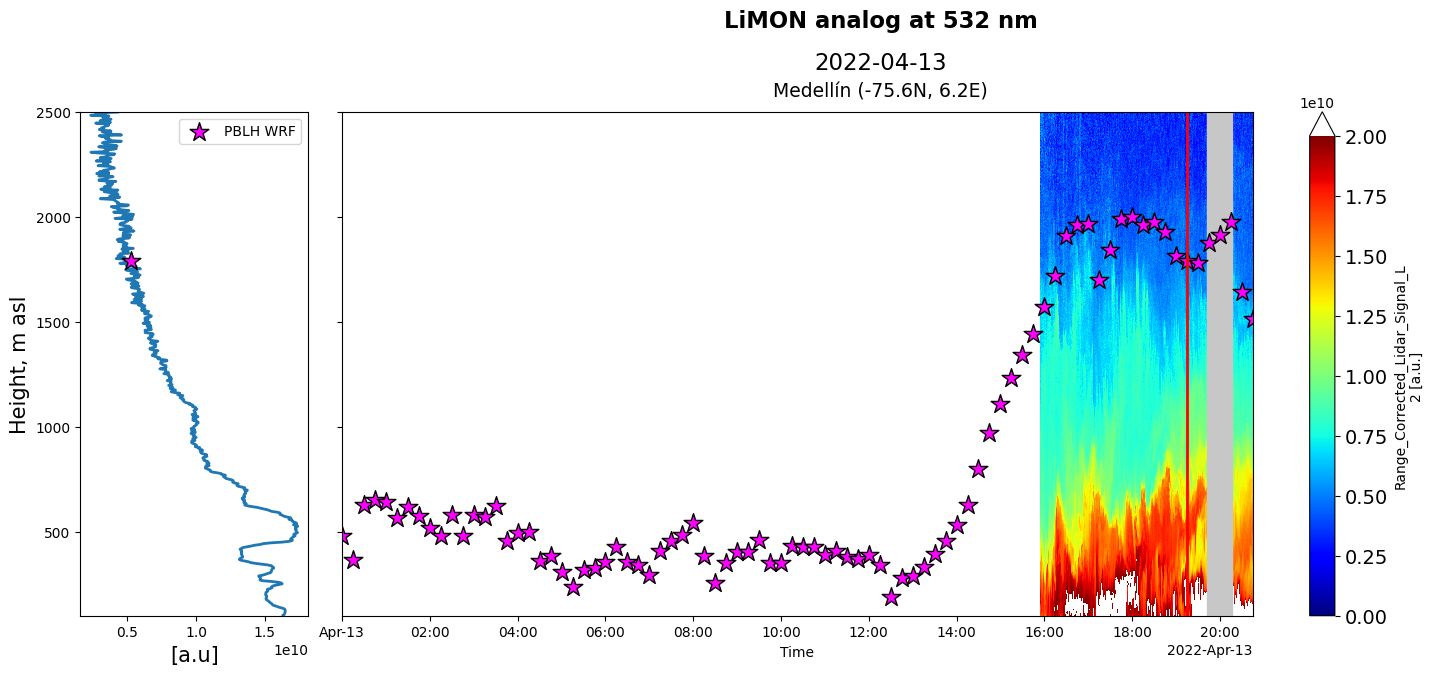

<class 'numpy.ndarray'>


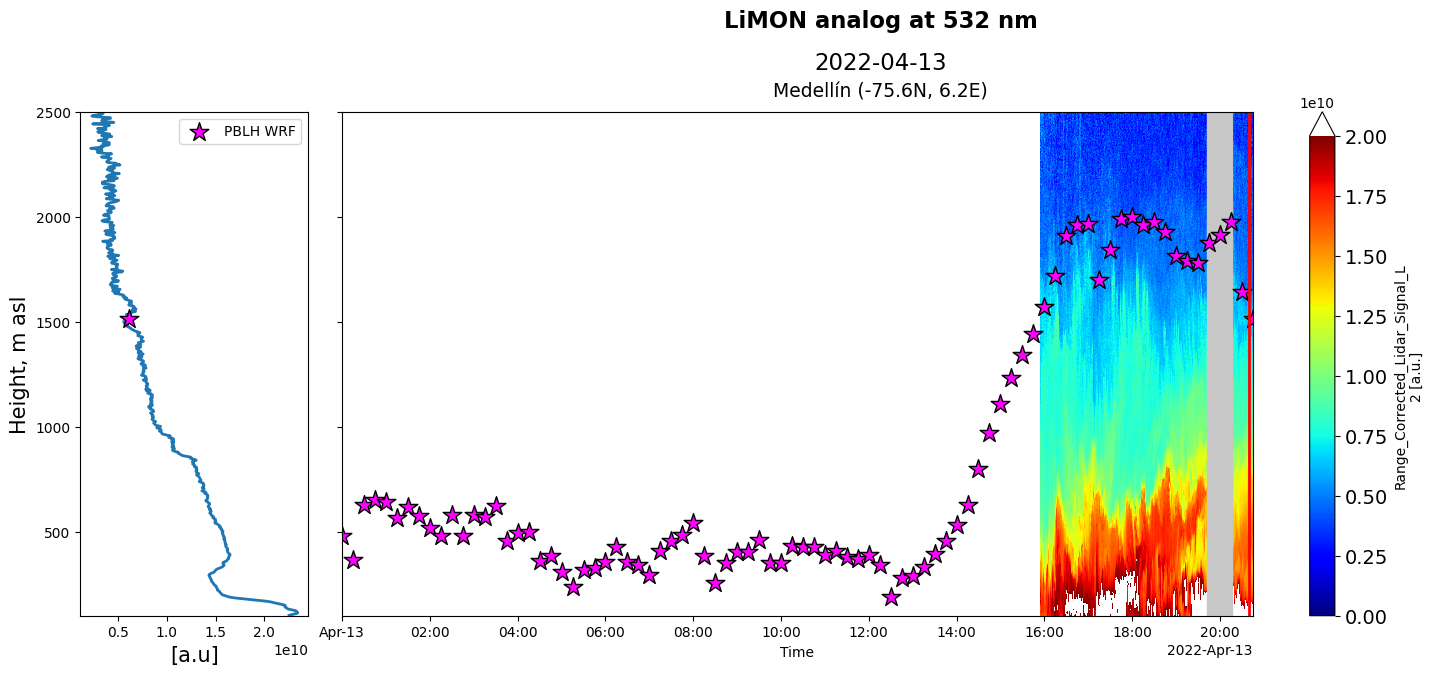

<class 'numpy.ndarray'>


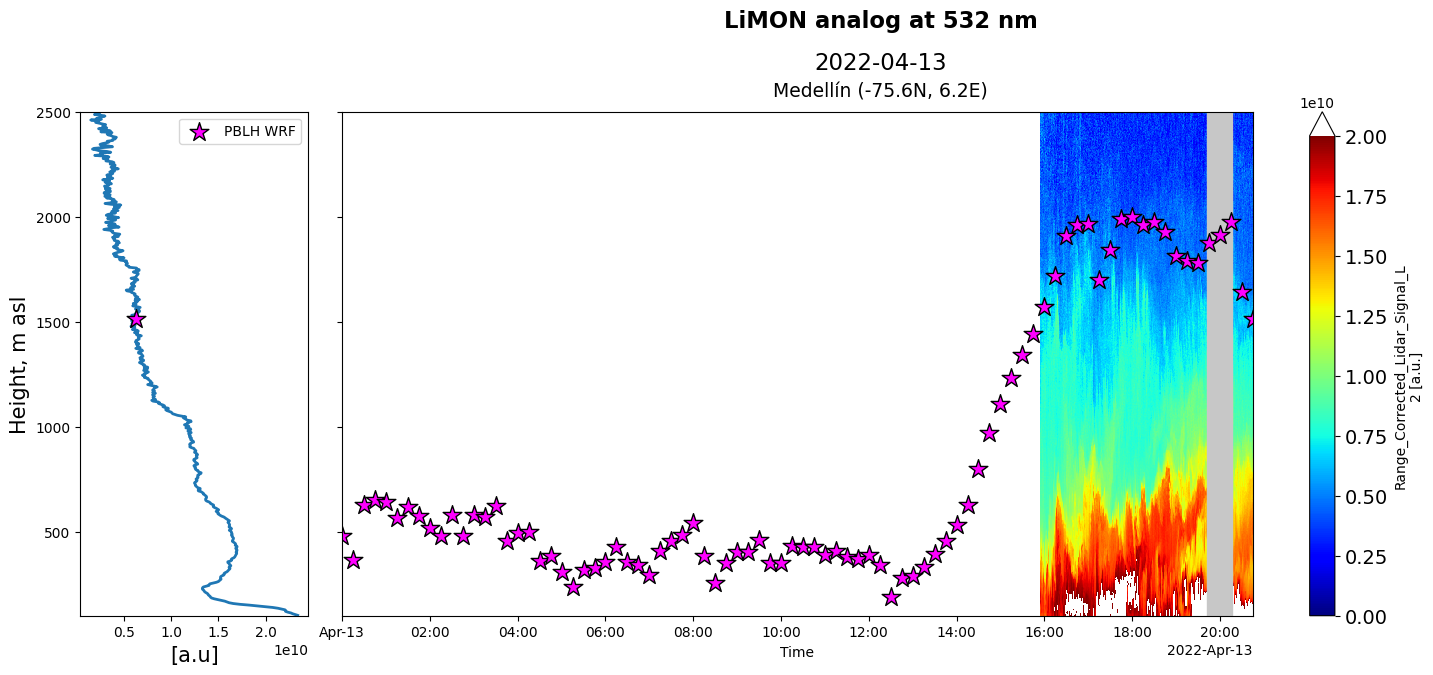

In [49]:

max_range = 2500
for time in dataset_lidar.time.values[::100]:
    # Definir subplots con proporción 1:4 entre ax1 y ax2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 7], sharey=True, gridspec_kw={'width_ratios': [1, 5]})

    # Obtener el perfil LIDAR para el tiempo actual
    lidar_profile = dataset_lidar.Range_Corrected_Lidar_Signal_L2.sel(time=time, range=slice(0, max_range))
    range_values = dataset_lidar.sel(range=slice(0, max_range)).range

    # Plot en ax1 con zorder menor
    ax1.plot(lidar_profile, range_values, linewidth=2, zorder=2)

    # Obtener los valores de PBLH para el tiempo actual
    pblh_wrf = ds_wrf.PBLH.sel(Time=time, method="nearest").values

    # Graficar las estrellas en ax1 con zorder mayor
    # Para pblh_wrf
    ax1.scatter(
        lidar_profile.sel(range=pblh_wrf, method="nearest"),
        pblh_wrf,
        marker="*",
        c="magenta",
        edgecolors="black",
        s=200,
        zorder=3,
        label='PBLH WRF'
    )



    ax1.legend()

    ax1.set_ylabel('Height, m asl', fontsize=15)
    ax1.set_xlabel('[a.u]', fontsize=15)

    # Plot en ax2
    plot_as_me(
        ds=dataset_lidar.sel(range=slice(0, max_range)),
        channel='Range_Corrected_Lidar_Signal_L2',
        axes=ax2,
        qt="Limon",
        wl="532",
        signal_mode="analog",
        attrs=global_attributes,
        vmin=0,
        vmax=2e10,
        fixed_time_range=False
    )

    ds_wrf.PBLH.plot.scatter(
        x="Time",
        ax=ax2,
        s=200,
        marker="*",
        color="magenta",
        edgecolors="black",
    )


    # Crear rectángulo para resaltar el tiempo actual en ax2de
    width = end - start
    rect = mpl.patches.Rectangle(
        (start, 0),
        width,
        max_range,
        linewidth=2,
        color='red',
        fill=False
    )
    ax2.add_patch(rect)

    # Eliminar etiquetas de ticks del eje y en ax2
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel('')  # Eliminar label del eje y en ax2

    plt.subplots_adjust(
        left=0.1,
        bottom=0.1,
        right=0.8,
        top=0.82,
        wspace=0.05,
        hspace=0.4
    )
    plt.xlim([ds_wrf.Time.values[0], ds_wrf.Time.values[-1]])
    plt.show()
